In [74]:
# Get helper_functions.py script from course GitHub
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py 

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir




--2022-06-21 08:52:01--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.7’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-06-21 08:52:01 (84.1 MB/s) - ‘helper_functions.py.7’ saved [10246/10246]



In [75]:
rmdir /content/MyModel/Train/.ipynb_checkpoints

rmdir: failed to remove '/content/MyModel/Train/.ipynb_checkpoints': No such file or directory


In [76]:
rmdir /content/MyModel/Test/.ipynb_checkpoints

rmdir: failed to remove '/content/MyModel/Test/.ipynb_checkpoints': No such file or directory


In [77]:
walk_through_dir("/content/MyModel")

There are 5 directories and 0 images in '/content/MyModel'.
There are 0 directories and 0 images in '/content/MyModel/Custom_Images'.
There are 4 directories and 0 images in '/content/MyModel/Val'.
There are 0 directories and 0 images in '/content/MyModel/Val/.ipynb_checkpoints'.
There are 0 directories and 15 images in '/content/MyModel/Val/One'.
There are 0 directories and 15 images in '/content/MyModel/Val/All'.
There are 0 directories and 15 images in '/content/MyModel/Val/None'.
There are 0 directories and 0 images in '/content/MyModel/.ipynb_checkpoints'.
There are 3 directories and 0 images in '/content/MyModel/Train'.
There are 0 directories and 70 images in '/content/MyModel/Train/One'.
There are 0 directories and 70 images in '/content/MyModel/Train/All'.
There are 0 directories and 70 images in '/content/MyModel/Train/None'.
There are 3 directories and 0 images in '/content/MyModel/Test'.
There are 1 directories and 15 images in '/content/MyModel/Test/One'.
There are 0 direc

In [78]:
# Create training and test directories
train_dir = "/content/MyModel/Train/"
test_dir = "/content/MyModel/Test/"

In [79]:
# Creating data inputs
import tensorflow as tf
IMG_SIZE = (224,224)
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical", # what type are the labels?
                                                                            batch_size=32) 

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                           image_size=IMG_SIZE,
                                                                           label_mode="categorical")



Found 210 files belonging to 3 classes.
Found 45 files belonging to 3 classes.


In [80]:
train_data.class_names

['All', 'None', 'One']

In [81]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [82]:
data_augmentation = keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(1.8),
    preprocessing.RandomZoom(0.4),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
], name = "data_augmentation")

In [83]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os 
import random

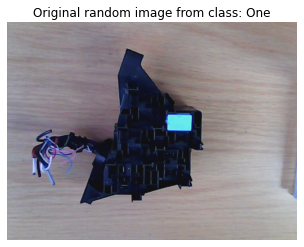

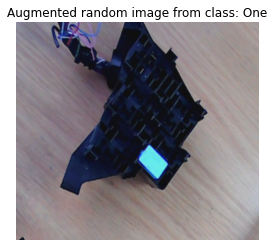

In [84]:
target_class = random.choice(train_data.class_names) #choose a random class
target_dir = "/content/MyModel/Train/" +target_class #create teh target directory
os.listdir(target_dir)
random_image = random.choice(os.listdir(target_dir)) #choose random imagefrom target directory
random_image_path = target_dir+"/" + random_image #create chose random image path
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Original random image from class: {target_class}")
plt.axis(False); 

#Augment the image
augmented_img = data_augmentation(tf.expand_dims(img, axis=0)) #data augmentation requires shape (None,height,width,3)
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.) #requires normalization after augmentation
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False);

In [85]:
#setup the input and base model, freezing the base model layers
input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

#Create input layer
inputs = layers.Input(shape=input_shape, name="input_layer")

#Add in data augmentation Sequential model as layer
x = data_augmentation(inputs)

#Give base_model inputs (after augmentation) and don't train it
x = base_model(x, training=False)

#Pool output features of base model
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

#Put a dense layer on as the output
outputs = layers.Dense(3, activation = "softmax", name = "output_layer")(x)

#Make a model with inputs and outputs
model_1 = keras.Model(inputs, outputs)

#compile the model
model_1.compile(loss="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

#Fit the model 
history_1 = model_1.fit(train_data,
                                epochs = 5,
                                steps_per_epoch = len(train_data),
                                validation_data = test_data,
                                validation_steps = int(len(test_data)))
                                #callbacks = [create_tensorboard_callback("transfer_learning", "data_aug")])

Epoch 1/5
7/7 [==============================] - 19s 2s/step - loss: 1.1828 - accuracy: 0.4238 - val_loss: 0.6990 - val_accuracy: 0.9778
Epoch 2/5
7/7 [==============================] - 13s 2s/step - loss: 0.5112 - accuracy: 0.9048 - val_loss: 0.3947 - val_accuracy: 1.0000
Epoch 3/5
7/7 [==============================] - 12s 2s/step - loss: 0.2422 - accuracy: 0.9952 - val_loss: 0.2448 - val_accuracy: 1.0000
Epoch 4/5
7/7 [==============================] - 12s 2s/step - loss: 0.1264 - accuracy: 1.0000 - val_loss: 0.1731 - val_accuracy: 1.0000
Epoch 5/5
7/7 [==============================] - 13s 2s/step - loss: 0.0771 - accuracy: 1.0000 - val_loss: 0.1356 - val_accuracy: 1.0000


In [86]:
model_1.evaluate(test_data)

2/2 [==============================] - 2s 554ms/step - loss: 0.1356 - accuracy: 1.0000


[0.13558438420295715, 1.0]

In [87]:
train_data.class_names

['All', 'None', 'One']

In [92]:
def load_and_prep_image(filename, img_shape=224, scale=True):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).

  Parameters
  ----------
  filename (str): string filename of target image
  img_shape (int): size to resize target image to, default 224
  scale (bool): whether to scale pixel values to range(0, 1), default True
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.io.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img

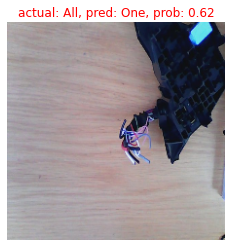

In [106]:
 # Load the image and make predictions
class_names = test_data.class_names
img = load_and_prep_image('/content/o4.jpg', scale=False) # don't scale images for EfficientNet predictions
pred_prob = model_1.predict(tf.expand_dims(img, axis=0)) # model accepts tensors of shape [None, 224, 224, 3]
pred_class = class_names[pred_prob.argmax()] # find the predicted class 

  # Plot the image(s)
#plt.subplot(1)
plt.imshow(img/255.)
if 'All' == pred_class: # Change the color of text based on whether prediction is right or wrong
  title_color = "g"
else:
  title_color = "r"
plt.title(f"actual: {'All'}, pred: {pred_class}, prob: {pred_prob.max():.2f}", c=title_color)
plt.axis(False);

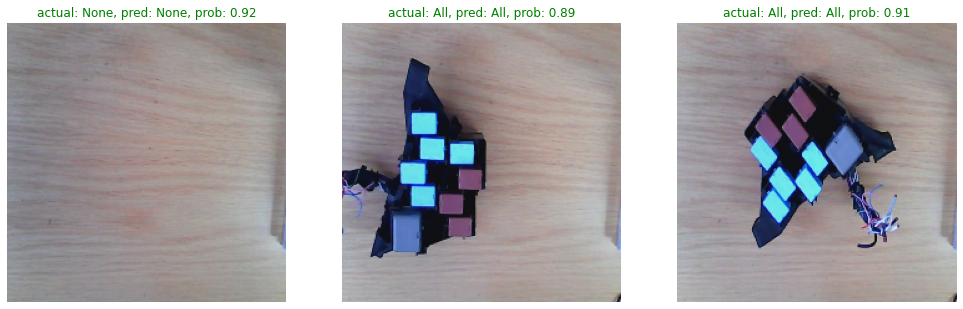

In [111]:
# Make preds on a series of random images
import os
import random

plt.figure(figsize=(17, 10))
class_names = test_data.class_names
for i in range(3):
  # Choose a random image from a random class 
  class_name = random.choice(class_names)
  filename = random.choice(os.listdir(test_dir + "/" + class_name))
  filepath = test_dir + class_name + "/" + filename

  # Load the image and make predictions
  img = load_and_prep_image(filepath, scale=False) # don't scale images for EfficientNet predictions
  pred_prob = model_1.predict(tf.expand_dims(img, axis=0)) # model accepts tensors of shape [None, 224, 224, 3]
  pred_class = class_names[pred_prob.argmax()] # find the predicted class 

  # Plot the image(s)
  plt.subplot(1, 3, i+1)
  plt.imshow(img/255.)
  if class_name == pred_class: # Change the color of text based on whether prediction is right or wrong
    title_color = "g"
  else:
    title_color = "r"
  plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.max():.2f}", c=title_color)
  plt.axis(False);
